In [10]:
#some basic imports and setups
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

#mean of imagenet dataset in BGR
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)

%matplotlib inline

In [2]:
from alexnet import AlexNet
from caffe_classes import class_names

tf.reset_default_graph()

batch_size = 3
#placeholder for input and dropout rate
x = tf.placeholder(tf.float32, [batch_size, 227, 227, 3])
keep_prob = tf.placeholder(tf.float32)

#create model with default config ( == no skip_layer and 1000 units in the last layer)
model = AlexNet(x, keep_prob, 1000, [])

#define activation of last layer as score
score = model.fc8

#create op to calculate softmax 
softmax = tf.nn.softmax(score)


Ground truth: ['Walker hound, Walker foxhound' 'drum, membranophone, tympan' 'malinois']
Ground truth: ['cardigan' 'electric locomotive'
 'orangutan, orang, orangutang, Pongo pygmaeus']
Ground truth: ['Samoyed, Samoyede' 'geyser' 'cornet, horn, trumpet, trump']


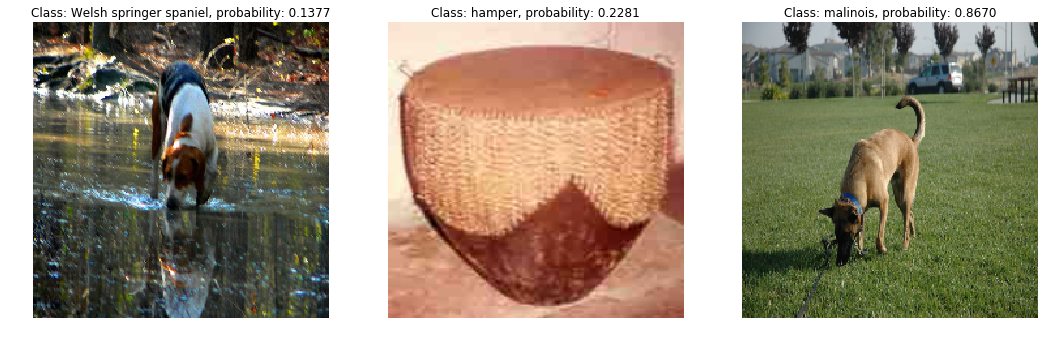

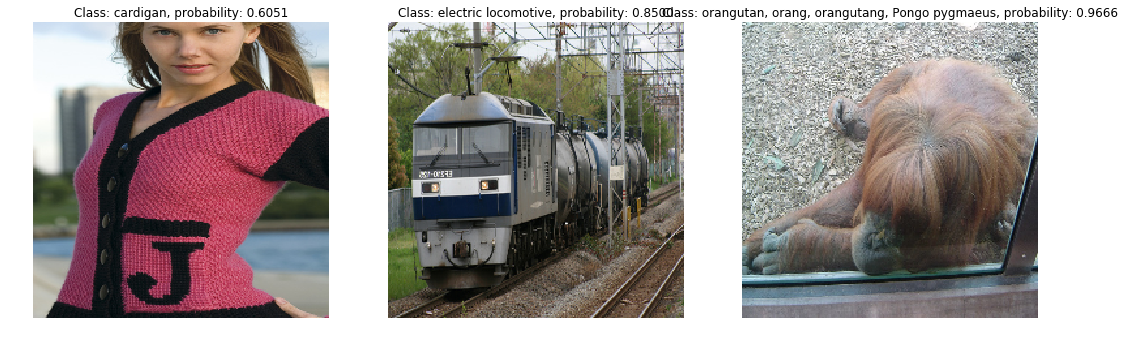

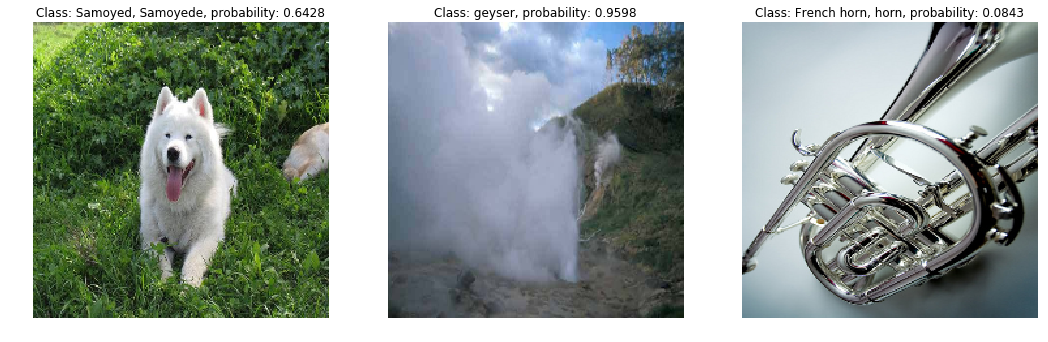

In [3]:
from datagenerator import ImageDataGenerator
# Test random images for BVLC converted weights

# Test multiple batches of images
num_batches = 3

# Path to the textfiles for the trainings and validation set
train_file = './train.txt'
val_file = './val.txt'

train_generator = ImageDataGenerator(train_file, horizontal_flip = True, shuffle = True)
val_generator = ImageDataGenerator(val_file, shuffle = False)

with tf.Session() as sess:
    
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Load the pretrained weights into the model
    model.load_initial_weights(sess)
    
    # Create figure handles
    fig_handles = []
    
    # Loop over all images
    for i in range(num_batches):
        fig_handles.append(plt.figure(figsize=(18,6)))
        batch_xs, batch_ys = train_generator.next_batch(batch_size)

        # Convert image to float32 and resize to (227x227)
        imgs = batch_xs.astype(np.float32)

        # Images from ImageDataGenerator already have mean subtracted
        
        # Run the session and calculate the class probability
        with tf.Graph().as_default():
            probs = sess.run(softmax, feed_dict={x: batch_xs, keep_prob: 1})

        # Get the class names of the classes with the highest probability
        class_names = np.array(class_names)
        batch_class_names = class_names[np.argmax(probs, 1)]
        true_class_names = class_names[np.argmax(batch_ys, 1)]
        print("Ground truth: " + str(true_class_names))

        # Plot images
        for img_ind, img in enumerate(batch_xs):
            # Plot images with class names and probs in the title
            ax = fig_handles[i].add_subplot(1,3,img_ind+1)
            img += imagenet_mean 
            img = img.astype(np.uint8)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.title.set_text("Class: " + batch_class_names[img_ind] + ", probability: %.4f" %probs[img_ind,np.argmax(probs, 1)[img_ind]])
            plt.axis('off')

INFO:tensorflow:Restoring parameters from ./tmp/finetune_alexnet/model_epoch2.ckpt
Ground truth: ['book jacket, dust cover, dust jacket, dust wrapper'
 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca'
 'desktop computer']
Ground truth: ['dogsled, dog sled, dog sleigh' 'Appenzeller' 'fig']
Ground truth: ['crayfish, crawfish, crawdad, crawdaddy' 'otter'
 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca']


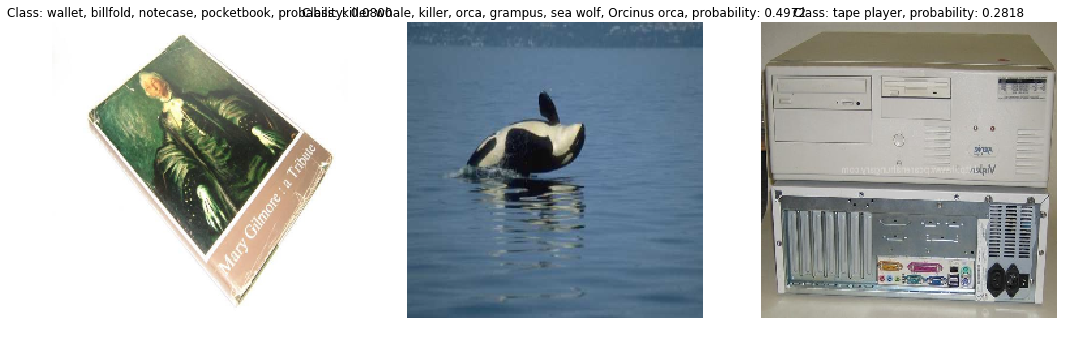

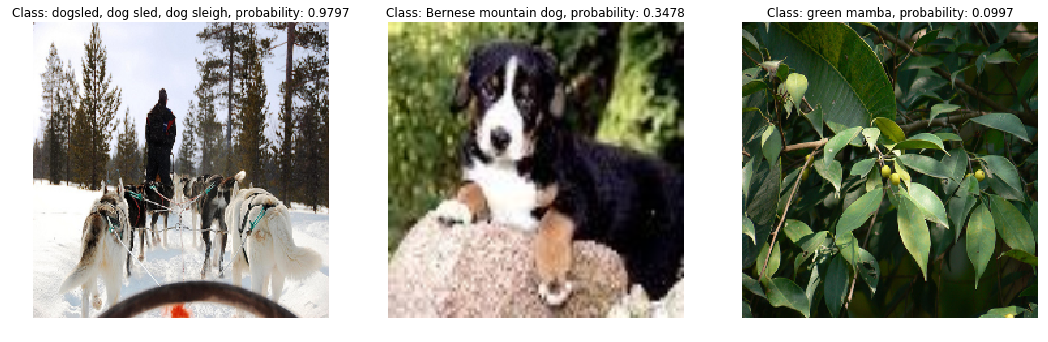

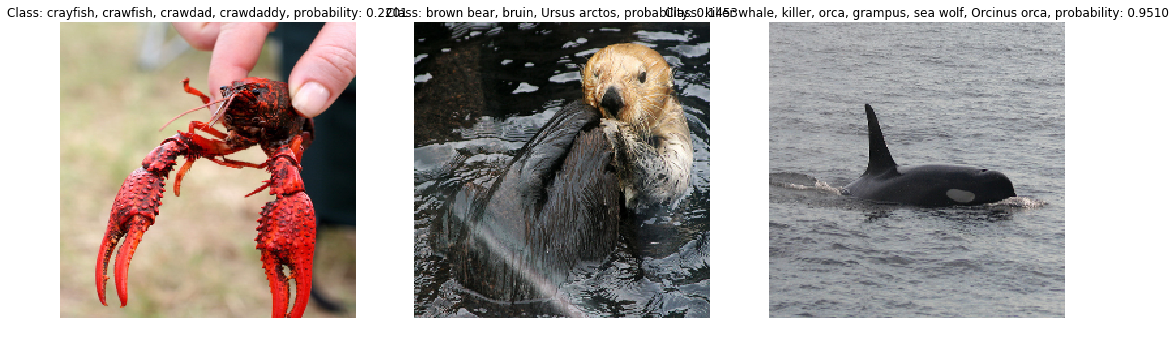

In [8]:
from datagenerator import ImageDataGenerator
# Test random images for BVLC converted weights

# Test multiple batches of images
num_batches = 3

# Path to the textfiles for the trainings and validation set
train_file = './train.txt'
val_file = './val.txt'
checkpoint_path = "./tmp/finetune_alexnet/"

train_generator = ImageDataGenerator(train_file, horizontal_flip = True, shuffle = True)
val_generator = ImageDataGenerator(val_file, shuffle = False)

# Initialize an saver for store model checkpoints
saver = tf.train.Saver()

with tf.Session() as sess:
    
    # Load model from checkpoint
    saver.restore(sess, tf.train.latest_checkpoint(checkpoint_path))
                    
    # Initialize all variables
#     sess.run(tf.global_variables_initializer())
    
    # Load the pretrained weights into the model
#     model.load_initial_weights(sess)
    
    # Create figure handles
    fig_handles = []
    
    # Loop over all images
    for i in range(num_batches):
        fig_handles.append(plt.figure(figsize=(18,6)))
        batch_xs, batch_ys = train_generator.next_batch(batch_size)

        # Convert image to float32 and resize to (227x227)
        imgs = batch_xs.astype(np.float32)

        # Images from ImageDataGenerator already have mean subtracted
        
        # Run the session and calculate the class probability
        with tf.Graph().as_default():
            probs = sess.run(softmax, feed_dict={x: batch_xs, keep_prob: 1})

        # Get the class names of the classes with the highest probability
        class_names = np.array(class_names)
        batch_class_names = class_names[np.argmax(probs, 1)]
        true_class_names = class_names[np.argmax(batch_ys, 1)]
        print("Ground truth: " + str(true_class_names))

        # Plot images
        for img_ind, img in enumerate(batch_xs):

            # Plot images with class names and probs in the title
            ax = fig_handles[i].add_subplot(1,3,img_ind+1)
            img += imagenet_mean 
            img = img.astype(np.uint8)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.title.set_text("Class: " + batch_class_names[img_ind] + ", probability: %.4f" %probs[img_ind,np.argmax(probs, 1)[img_ind]])
            plt.axis('off')